# CS 2810 HW 3: Programming

Due alongside written hw3, see written hw 3 for due date information.

#### Submission Instructions

You can download any Jupyter Notebook as a python file via `file` -> `download as...` -> `python .py`.  You can either convert the notebook immediately and work in a text editor on the .py file, or work with the notebook and convert it at the end.  (Note that you can drag to rotate the 3D graphs here if you run a .py file, but not all browsers support this in the notebook.)

Submit this problem as a single `.py` file which is named `hw03_<firstname>_<lastname>.py` (ensure only those two underscores are used).

The names of all variables and function definitions must be consistent with what is used here.  For example, a problem may ask you to define function `matmult_n(X, y, n)`.  Name the function and its input arguments exactly as shown, noting capitalization.  This is critical to streamline grading.  If your solutions are not named appropriately, the grader may elect to remove all credit.  Thanks for your help in making our grading more efficient!

#### Academic Integrity

Under no circumstances should you observe another student's code which was written for this programming assignment, from this year or past years.

#### HW3 specific instructions:

- You must also submit the two screenshots needed for part C below
- Rotate the 3d graphs by dragging them to get a better sense of how the points are distributed in space.  (This may not work in all browsers, but it will if you run the code from the .py file.)

# Visualizing the span in 2d

Let's explore the span of two sets of vectors.  Remember, the **span** of a set of vectors $v_1, v_2, v_3, ...$ is the set of all vectors $x$ which may be represented as a linear combination of these vectors:

$$ [x] = \{x | x = \alpha_1 v_1 + \alpha_2 v_2 + \alpha_3 v_3 + ... \} $$

for scalars $\alpha_i$.

Let's take a look at two sets of vectors:

$$ a = \{ \begin{bmatrix} 3 \\ -2 \end{bmatrix}, \begin{bmatrix} 1 \\ 3 \end{bmatrix} \} $$

and 

$$ b = \{ \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \begin{bmatrix} 2 \\ 4 \end{bmatrix} \} $$

Remember that the linear combination of these vectors is just a matrix-vector multiplication.  For example, a linear combination of the vectors in $a$ is just:

$$ \alpha_1 \begin{bmatrix} 3 \\ -2 \end{bmatrix} + \alpha_2 \begin{bmatrix} 1 \\ 3 \end{bmatrix} = \begin{bmatrix} 3 & 1\\ -2 & 3 \end{bmatrix}  \begin{bmatrix} \alpha_1 \\ \alpha_2 \end{bmatrix} = A \vec{\alpha} $$

where $A$ is the matrix formed from the column vectors in $a$ and $\vec{\alpha} =  \begin{bmatrix} \alpha_1 \\ \alpha_2 \end{bmatrix}$.  Below, assume a matrix $B$ is similarly formed from the column vectors in $b$.

The span of a set of vectors is infinite as long as it contains at least one vector that isn't the zero vector.  So we can't really draw the complete span.  However, we can try quite a few values in code, and see the patterns that emerge.  Let's choose a grid of equally spaced `alpha` values to show.  **Our grid may be bounded and discrete, but the span that it samples is continuous and infinite.**

<IPython.core.display.Javascript object>


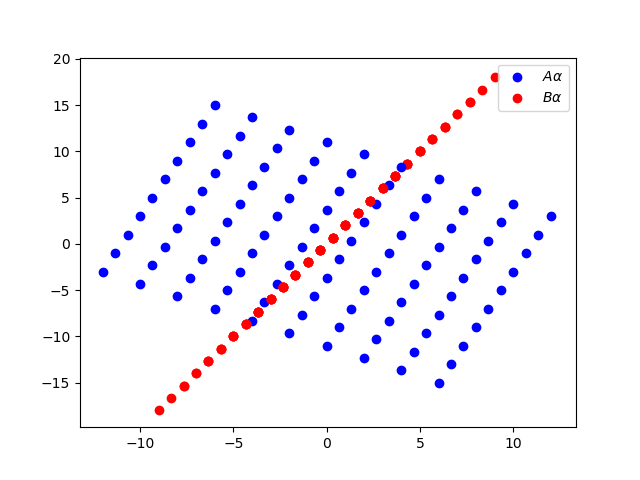

In [1]:
# this line enables interactive plots in the jupyter notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# don't set this too high, we've got to plot them
n_rand = 100

a = np.array([[3, 1], 
              [-2, 3]])
b = np.array([[1, 2], 
              [2, 4]])

# xy will be a (100, 2) array, each row is a sample
# we sample a grid of points, something like (0,0), (1,0), (0,1), (1,1)
# see doc on meshgrid for the heart of whats going on here
# check out the other numpy manipulations (linspace, flatten and vstack)
# look to the blue samples below to see what xyz looks like
lim = (-3, 3)
val = np.linspace(lim[0], lim[1], 10)
x, y = np.meshgrid(val, val)
xy = np.vstack((x.flatten(), y.flatten())).T

for sample_idx in range(xy.shape[0]):
    # choose an alpha vector
    alpha = xy[sample_idx, :]

    # compute the linear combination of columns of a, b using alpha as weights
    a_alpha = a @ alpha
    b_alpha = b @ alpha
    
    # plot them
    h_a = plt.scatter(a_alpha[0], a_alpha[1], color='b', label='ax')
    h_b = plt.scatter(b_alpha[0], b_alpha[1], color='r', label='bx')
    
ax = plt.gca()
    
# build legend from handles
plt.legend((h_a, h_b), (r'$A \alpha$', r'$B \alpha$'));

## Part A (3 points)
Explain what we are seeing with this graph:  why do the two matrices produce the two patterns that we are seeing here?  How could we have predicted the rough shapes we're seeing by analyzing the matrices themselves?

In [2]:
part_a = """ your answer to part a here """

    
## 3D space
We can use the same approach to visualize the span in 3d too.  Consider the following sets of vectors:


$$ c = \{ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix},  \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \} $$

and 

$$ d = \{ \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \begin{bmatrix} .5 \\ 1 \\ 1.5 \end{bmatrix},  \begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix} \} $$

we choose another `n_rand` arbitrary values of alpha to produce linear combinations.

<IPython.core.display.Javascript object>


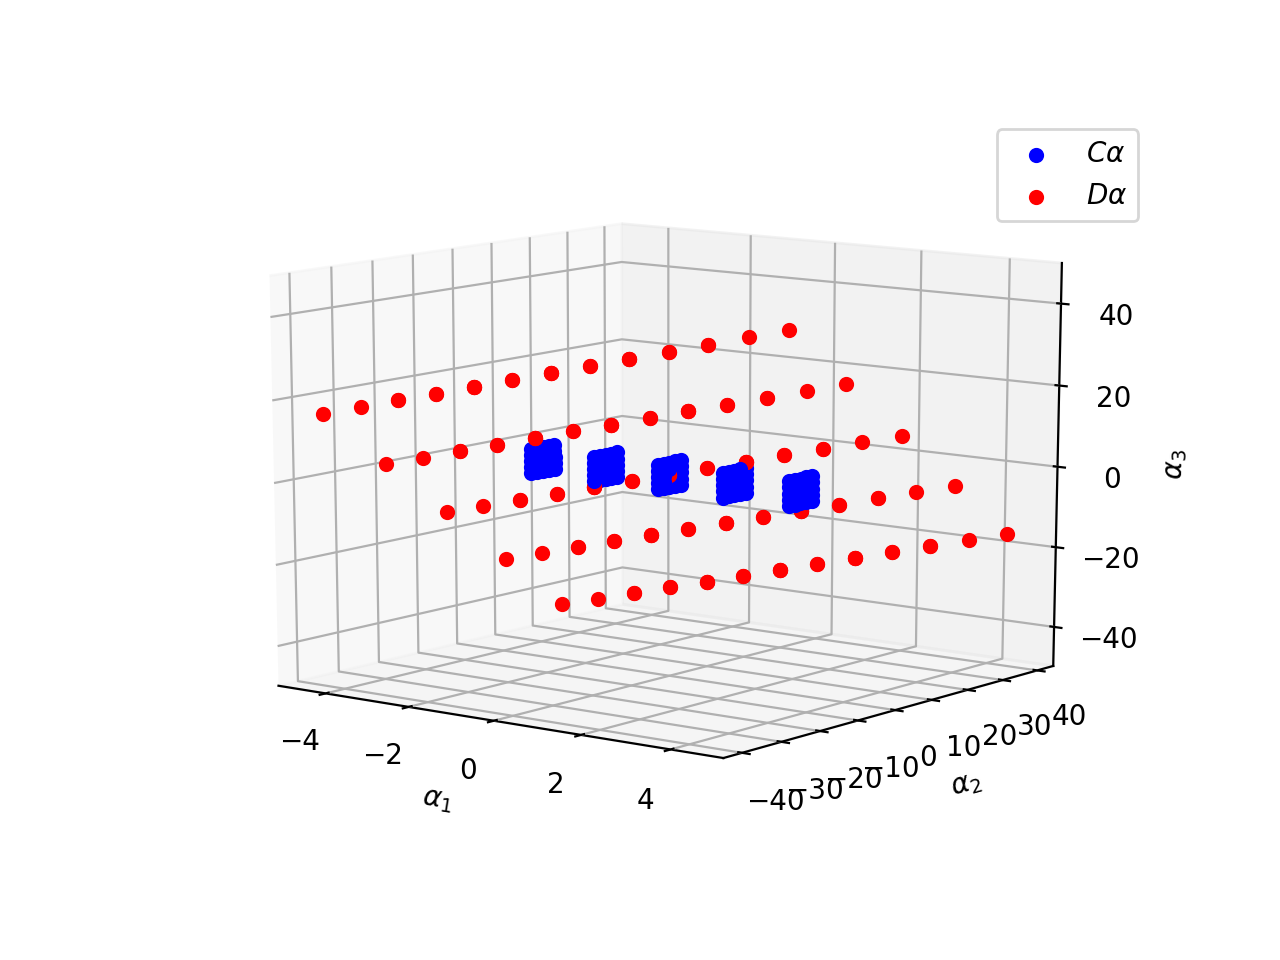

In [8]:
c = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

d = np.array([[1, .5, 0],
              [2, 1, 10],
              [3, 1.5, -10]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# xyz will be a (1000, 3) array, each row is a sample
# we sample a grid of points, something like (0,0), (1,0), (0,1), (1,1)
# see doc on meshgrid for the heart of whats going on here
# check out the other numpy manipulations (linspace, flatten and vstack)
# look to the blue samples below to see what xyz looks like
lim = (-3, 3)
val = np.linspace(lim[0], lim[1], 5)
x, y, z = np.meshgrid(val, val, val)
xyz = np.vstack((x.flatten(), y.flatten(), z.flatten())).T

for sample_idx in range(xyz.shape[0]):
    # choose an alpha vector
    alpha = xyz[sample_idx, :]

    # compute the linear combination of columns of a, b using alpha as weights
    c_alpha = c @ alpha
    d_alpha = d @ alpha
    
    # plot them
    h_c = ax.scatter(c_alpha[0], c_alpha[1], c_alpha[2], color='b')
    h_d = ax.scatter(d_alpha[0], d_alpha[1], d_alpha[2], color='r')
    
# build legend from handles
plt.legend((h_c, h_d), (r'$C \alpha$', r'$D \alpha$'))
ax.set_xlabel(r'$\alpha_1$')
ax.set_ylabel(r'$\alpha_2$')
ax.set_zlabel(r'$\alpha_3$');

## Part B (4 points)
Again, explain why we're seeing the patterns that we see for the possible results of multiplication by the two matrices.  What is the dimension of the range space in each case, and how could we have predicted those values from the matrices themselves?

In [4]:
part_b = """ your answer to part b here """

## Part C (18 points)

- C.1 Choose a $3 \times 3$ matrix $E$ of rank 2, which you'll use in the parts below. (3 pts)
- C.2 Identify a basis for the kernel (null space) of $E$. (3 pts)
- C.3 Identify a basis for the span of column vectors of E (column space).  (3 pts)
- C.4 Finally, make two separate scatter plots in which you show the results of multiplying your matrix by a 3D grid of points, similar to the example for matrices C and D.  In one plot, additionally show basis vectors for the range space (the span of the columns).  In the other plot, additionally show a basis vector for the kernel.  To plot a vector, you can for example plot  $\begin{bmatrix} 1 \\ 3 \end{bmatrix}$ via `plt.plot([0, 1], [0, 3], linewidth=3)` (the linewidth just makes the line thicker so it's more visible).  Take a screenshot of each of the two vector spaces and save them as `E_kernel.png` and `E_col_span.png` respectively.  (You should also, of course, turn in the code that generated these graphs in your .py file.)  (9 points total).  

In addition to the two screenshots above, define the following variables in your `.py` submission:

In [5]:
# construct your E below:
E = np.array([])

# write one matrix, each column of which is a vector of your basis of the kernel of E
E_kernel_basis = np.array([])

# write one matrix, each column of which is a vector of your basis of the column span of E
E_col_span_basis = np.array([])